In [1]:
#On this data set a classifier will be trained to try and predict if a passenger survived the sinking of titanic or not
#based on features.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [3]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check percentage of null data in each feature , if percentage of missing values is more that 30% i will choose to
#drop them 
print(data.isnull().sum()*100/len(data))

#i will drop the cabin feature 

data.drop(columns=["Cabin"],inplace=True)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [5]:
#check if it was dropped
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [6]:
#replace null values of feature "Age" with median age 
data["Age"].fillna(data["Age"].median(),inplace=True)

/var/folders/jr/tvq5nl792n3951_njjcg1_0w0000gn/T/ipykernel_7509/1777030630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(),inplace=True)


In [7]:
#Check if it worked
print(data["Age"].isnull().sum())

0


In [8]:
#Since we try to evaluate if a person survived the sinking of the vessel or not ,some features wont play any role 
#for example the feature "embarked" wont play any role and just increase dimensionality for no reason 
#since the port of embarkation of a passenger doesnt play an role on the survival of thr passenger , the name as well ,
#the passenger id as well , so those features will be dropped ,but lets prove that they dont offer much , 
#Also ticket number is has many unique values , thus Overfitting ,High Cardinality is risked so it will be dropped
data.drop(columns=["PassengerId","Name","Embarked","Ticket"],inplace=True)

In [9]:
#lets make sure it worked 
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
#Now the data have been pre processed it is time to turn them into numerical data (some classifiers (For tree-based models))
#Features could be kept as objects , but i want to train a neural network 

In [11]:
print(data.dtypes)
data_encoded = pd.get_dummies(data, columns=['Sex'],drop_first=True,dtype=float)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object


In [12]:
data_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,0.0
2,1,3,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,0,3,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0
887,1,1,19.0,0,0,30.0000,0.0
888,0,3,28.0,1,2,23.4500,0.0
889,1,1,26.0,0,0,30.0000,1.0


In [13]:
data_encoded.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Sex_male    float64
dtype: object

In [14]:
#it is time to train a classifier , different classifiers will be trained
#and evaluated 


In [15]:
#Neural network classifier 


In [16]:
X=data_encoded.drop(columns=["Survived"])

In [17]:
y=data["Survived"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
#Now it is time to train the neural network 
#i will also scale the features 
# Feature Scaling: Standardize the data to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Create the MLPClassifier model
clfANN = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

#train the classifiers
clfANN.fit(x_train, y_train)                         


#get predictions on the train set
y_train_pred_ANN=clfANN.predict(x_train)


#test the trained model on the test set
y_test_pred_ANN=clfANN.predict(x_test)



confMatrixTestANN=confusion_matrix(y_test, y_test_pred_ANN, labels=None)
confMatrixTrainANN=confusion_matrix(y_train, y_train_pred_ANN, labels=None)



print ('\n Conf matrix, Train Set, Neural Net')
print (confMatrixTrainANN)
print ()



print ('\n Conf matrix, Test Set, Neural Net')
print (confMatrixTestANN)
print ()



# Measures of performance: Precision, Recall, F1


print ('Neural Net: Macro Precision, recall, f1-score')
print ( precision_recall_fscore_support(y_test, y_test_pred_ANN, average='macro'))
print ('Neural Net: Micro Precision, recall, f1-score')
print (precision_recall_fscore_support(y_test, y_test_pred_ANN, average='micro'))
print ('\n')
#accuracy 
accuracy_train = accuracy_score(y_train, y_train_pred_ANN)
accuracy_test = accuracy_score(y_test, y_test_pred_ANN)
print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


 Conf matrix, Train Set, Neural Net
[[410  29]
 [ 56 217]]


 Conf matrix, Test Set, Neural Net
[[93 17]
 [22 47]]

Neural Net: Macro Precision, recall, f1-score
(0.7715353260869565, 0.7633069828722003, 0.7667167919799498, None)
Neural Net: Micro Precision, recall, f1-score
(0.7821229050279329, 0.7821229050279329, 0.7821229050279329, None)


Train Accuracy: 88.06%
Test Accuracy: 78.21%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
#Lets do grid search 

# Create the MLPClassifier model
clfANN = MLPClassifier(random_state=42, max_iter=500)

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],  # Different number of neurons and layers
    'activation': ['relu', 'tanh'],  # Different activation functions
    'solver': ['adam', 'sgd'],  # Different solvers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'adaptive']  # Learning rate schedule
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clfANN, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_clf = grid_search.best_estimator_

# Evaluate the best model on the train and test set
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Confusion matrix
confMatrixTrain = confusion_matrix(y_train, y_train_pred)
confMatrixTest = confusion_matrix(y_test, y_test_pred)

print('\nConfusion Matrix - Train Set')
print(confMatrixTrain)
print('\nConfusion Matrix - Test Set')
print(confMatrixTest)

# Measures of performance: Precision, Recall, F1
print ('\nNeural Net: Macro Precision, Recall, F1-Score')
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print('Neural Net: Micro Precision, Recall, F1-Score')
print(precision_recall_fscore_support(y_test, y_test_pred, average='micro'))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}
Train Accuracy: 82.16%
Test Accuracy: 78.77%

Confusion Matrix - Train Set
[[376  63]
 [ 64 209]]

Confusion Matrix - Test Set
[[93 17]
 [21 48]]

Neural Net: Macro Precision, Recall, F1-Score
(0.7771255060728746, 0.7705533596837945, 0.773387526652452, None)
Neural Net: Micro Precision, Recall, F1-Score
(0.7877094972067039, 0.7877094972067039, 0.7877094972067039, None)


In [21]:
#Lets train a decision tree and compare results 
#SINCE A DECISION TREE WILL BE TRAINED AND TESTED THERE IS NO NEED TO CONVERT SEX FEATURE TO NUMERICAL DATA !!! 
#but it has already be done for the neural network

#Define decision Tree
clfDT =  tree.DecisionTreeClassifier()
#clfDT =  tree.DecisionTreeClassifier( max_depth=None, min_samples_leaf=20)
#clfDT= tree.DecisionTreeClassifier( max_depth=5)

#Training the classifier
clfDT.fit(x_train, y_train)

#test the trained model on the training set
Y_train_pred_DT=clfDT.predict(x_train)
#test the trained model on the test set
Y_test_pred_DT=clfDT.predict(x_test)

In [22]:
confMatrixTrainDT=confusion_matrix(y_train, Y_train_pred_DT, labels=None)
confMatrixTestDT=confusion_matrix(y_test, Y_test_pred_DT, labels=None)

print ('train: Conf matrix Decision Tree')
print (confMatrixTrainDT)
print ()

print ('test: Conf matrix Decision Tree')
print (confMatrixTestDT)
print ()

print(classification_report(y_test, Y_test_pred_DT))


# Some statistics on the Tree:
print('Max Depth=',clfDT.get_depth())
print('Number of Leaves=',clfDT.get_n_leaves())

train: Conf matrix Decision Tree
[[436   3]
 [ 10 263]]

test: Conf matrix Decision Tree
[[96 14]
 [20 49]]

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Max Depth= 23
Number of Leaves= 161


Area Under Curve (AUC) 0.789


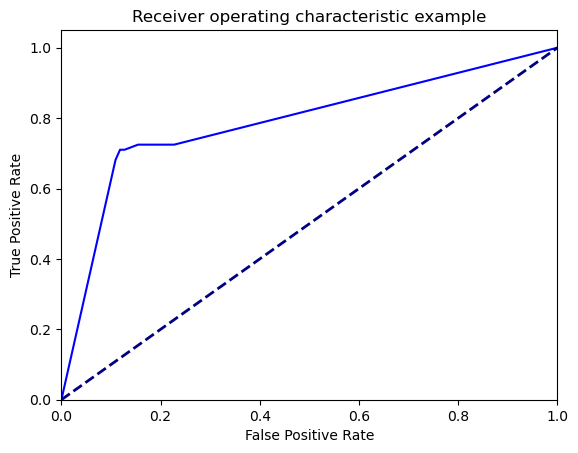

In [23]:
#Produce probabilities for each item to belong to class 0 or class 1
pr_y_test_pred_DT=clfDT.predict_proba(x_test)

#ROC curve for the class encoded by 0, survived
#Get false positive rate, and true positive rate 
fprDT, tprDT, thresholdsDT = roc_curve(y_test, pr_y_test_pred_DT[:,1])

roc_auc = roc_auc_score(y_test, pr_y_test_pred_DT[:,1])
print('Area Under Curve (AUC) %.3f' % roc_auc)


#line width
lw=2
plt.figure(10)
plt.plot(fprDT,tprDT,color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

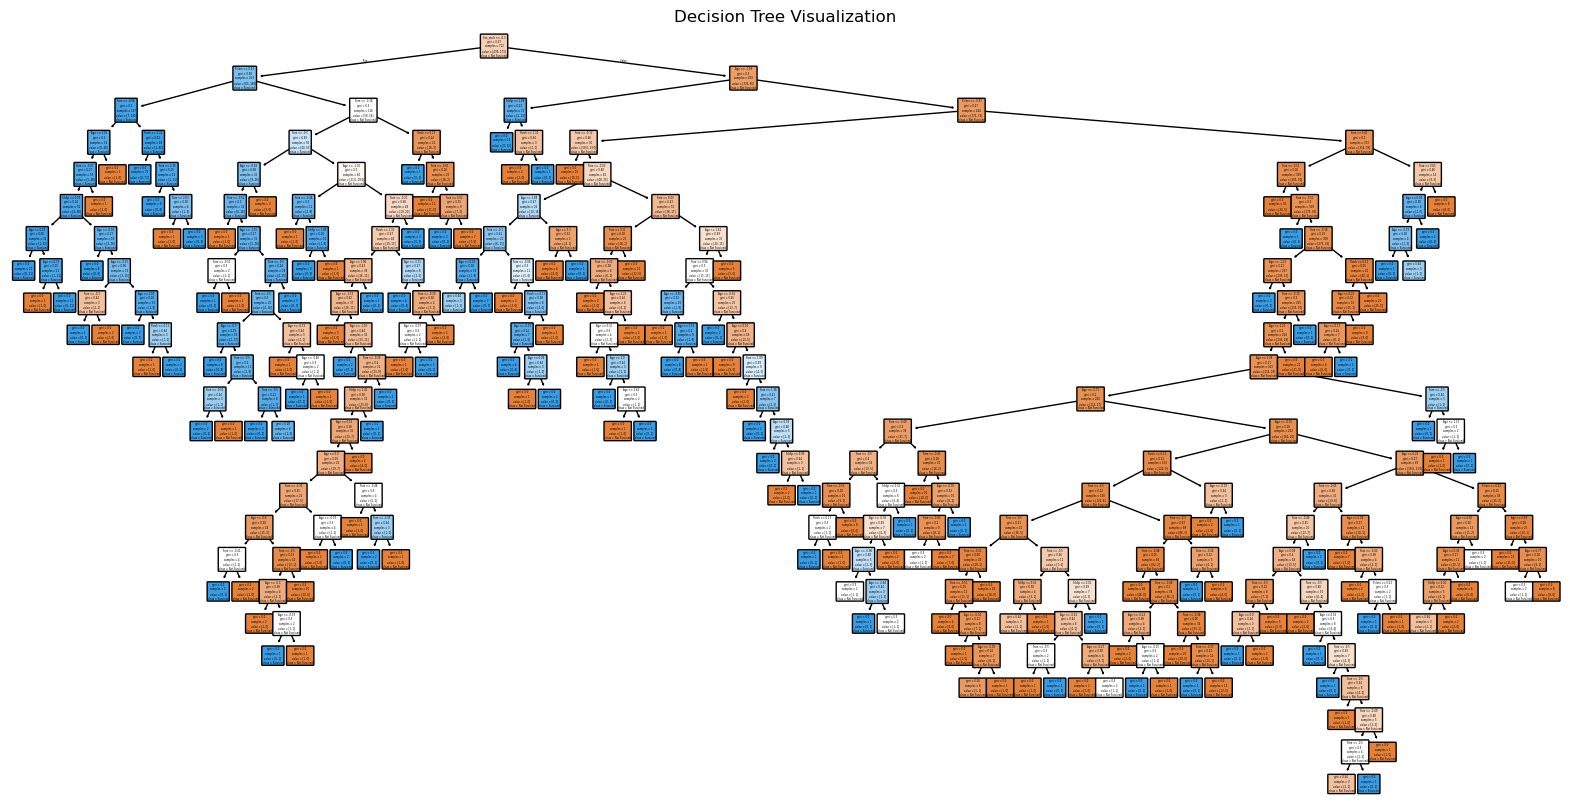

In [24]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot
tree.plot_tree(clfDT, 
               filled=True, 
               feature_names=X.columns, 
               class_names=['Not Survived', 'Survived'], 
               rounded=True, 
               proportion=False, 
               precision=2)
plt.title('Decision Tree Visualization')
plt.show()